# $\color{orange}{\text{Jupyter notebook bij Hoofdstuk 4 van Kwantummechanica 1}}$

Deze python notebook illustreert een aantal aspecten die aan bod komen in Hoofdstuk 4 van Kwantummechanica 1

Jan Ryckebusch, november 2020-2023

Suggesties voor aanpassingen & aanvullingen zijn altijd welkom

In [1]:
import numpy as np   # numerical python: very fast computing
import matplotlib.pyplot as plt # matplotlib: nice & quick figures
from matplotlib import animation as animation # for the animation ...
# https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
from IPython.display import HTML # for the animation to work in Google colab
from scipy.special import eval_hermite # Hermite polynoom for HO
from scipy.integrate import odeint # integration of ODEs
import math as m
# change some plot parameters ... things look better
params = {'legend.fontsize': 'x-large',
#          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.rcParams['font.family'] = "serif"

# Bij paragraaf 4.5: De oneindige vierkante potentiaalput

De potentiaalput komt overeen met de volgende potentiaal:

- $V(x)=0$ voor $x \in \left[-a , +a \right]$
- $V(x)=+\infty$ voor $ \left| x \right| \gt  a $

In wat volgt worden de energie-eigenfuncties $\psi _n(x)$ en energie-eigenwaarden $E_n$ van de TISE voor de oneindige vierkante potentiaalput gebruikt om de algemene oplossing van de TDSE te bepalen:

$\Psi (x,t) = \sum _{n=1}^{n= \infty} c_n \exp \left( - \frac{i} {\hbar} E_n t \right) \psi_n (x) $

voor gegeven $c_n$ (= variable *compy*) te bepalen.

Herinner dat voor gegeven $V(x)$ men heeft dat $E_n = n ^2 E_1$.

Hieruit volgt dat: $\exp ( - \frac{i} {\hbar} E_n t) = \exp ( - i \omega _n t) = \exp - i n^2 \frac{t} {\left( \frac{P_1}{2 \pi} \right)}$ met $\omega _1 = \frac { 2 \pi} {P_1}$. Dit maakt het handig om de tijd $t$ uit te drukken in eenheden $\frac { 2 \pi} {P_1}$. Dit betekent dat we dimensieloze grootheid $t ^ {\prime} = \frac {t} {\left( \frac{P_1}{2 \pi} \right)} $ introduceren. Voor $t ^ {\prime} = 2 \pi$ hebben we $t = P_1$ (periodiciteit van de beweging).

**Algemene grootheden bij de beschrijving van eendimensionale kwantumsystemen:**

* positiewaarschijnlijkheidsdichtheid:  $P(x,t) = \Psi ^* (x,t) \; \Psi  (x,t) $
* waarschijnlijkheidsstroomdichtheid (``flux''): $j(x,t) = \frac{\hbar}{m} \text{Im} \left[ \Psi ^* (x,t) \; \frac {
	\partial \Psi  (x,t) } {\partial x} \right]$


In [15]:
# genormeerde energie-eigenfuncties (wav) van de oneindig diepe put in [-a,+a]
# ook de afgeleiden (dwav) worden berekend
#
def eigfuncwell(n,x,a):
  cte=n*np.pi/(2.*a)
  rx=cte*x
  if n % 2 == 0:
    wav = 1./np.sqrt(a)*np.sin(rx)
    dwav= cte/np.sqrt(a)*np.cos(rx)
  else:
    wav = 1./np.sqrt(a)*np.cos(rx)
    dwav= -cte/np.sqrt(a)*np.sin(rx)
  return wav,dwav

Normalized weights $c_n$:  [0.54772256 0.83666003]
Aantal punten in x/a is 400
Aantal punten in t is 100
Vorm van de P(x,t) numpy array=  (100, 400)
Vorm van x_as_function_of_t numpy array=  (100,)


<Figure size 640x480 with 0 Axes>

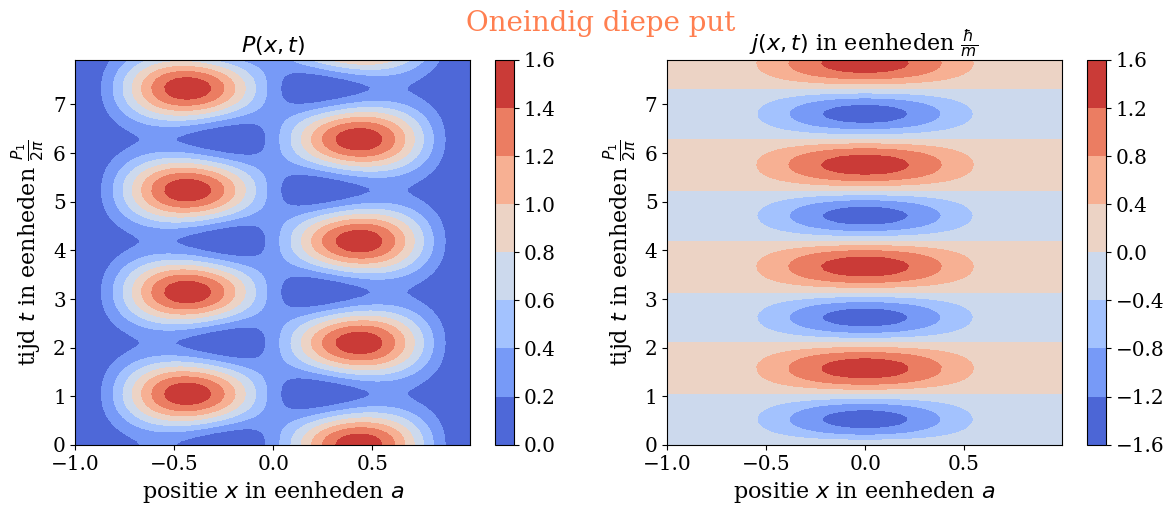

In [16]:
#  hier construeren we de totale golffunctie \Psi (x,t) als een lineaire combinatie van eigenfuncties van de TISE

# de componenten c_E in de totale goffunctie \Psi (x,t) = compi
# (geef de gewichten = amplitudes: programma zal normeren)
#compi=np.array([0.5]) # INPUT ... jouw keuze
#compi=np.array([0.5,0.5]) # INPUT ... jouw keuze
#compi=np.array([1./2,1./3,1./6]) # input jouw keuze voor de amplitudes van de componenten ...
compi=np.array([np.sqrt(3./10.),np.sqrt(7/10.)]) # input jouw keuze voor de amplitudes ...
# normeer de totale golffunctie
norm=np.sum(np.power(compi,2.))
compi/=np.sqrt(norm)
print("Normalized weights $c_n$: ",compi)

stepinx=0.005# de stapgrootte voor de x waarden
xlist = np.arange(-1.0,+1.0,stepinx,dtype=float) # range of x-values (x in eenheden a)
tlist = np.arange(0.,8.0,0.08,dtype=float) # range of t-values (t in eenheden P_1/(2\pi))

X,Y=np.meshgrid(xlist,tlist)

# totale golffunctie PSIT, zijn afgeleide DPSIT; PSIWX (golffunctie \times x) ; PSIWXX (golffunctie \times x)
PSIT=(X-X)+(Y-Y) # allemaal nullen ; de juiste vorm
DPSIT=PSIT       # allemaal nullen ; de juiste vorm
PSIWX=PSIT       # allemaal nullen ; de juiste vorm
PSIWXX=PSIT       # allemaal nullen ; de juiste vorm

for kk in range(len(compi)): # loop over het aantal van nul verschillende amplitudes in de golffunctie
  wav,dwav=eigfuncwell(kk+1,xlist,1.)
  tdepen=np.exp(-complex(0.,1.)*(kk+1)**2.*tlist)
  psiofx, foft = np.meshgrid(wav,tdepen)
  dpsiofx, foft = np.meshgrid(dwav,tdepen)
  psiwx,foft = np.meshgrid(np.multiply(wav,xlist),tdepen)
  psiwxx,foft = np.meshgrid(np.multiply(wav,np.power(xlist,2.)),tdepen)
  PSIC = psiofx * foft * compi[kk] # golffunctie component \psi _n (x,t)
  DPSIC = dpsiofx * foft * compi[kk] # afgeleide van golffunctie component
  PSICWX = psiwx * foft * compi[kk] # x \times \psi _n (x,t)
  PSICWXX = psiwxx * foft * compi[kk] # x^2 \times \psi _n (x,t)

  PSIT=PSIT+PSIC # component toevoegen aan totale golffunctie
  DPSIT=DPSIT+DPSIC # component toevoegen aan afgeleide totale golffunctie
  PSIWX=PSIWX+PSICWX # component toevoegen aan (x \times totale golffunctie)
  PSIWXX=PSIWXX+PSICWXX # component toevoegen aan (x^2 \times totale golffunctie)

Pxt= np.real(np.multiply(PSIT,np.conj(PSIT))) # dit is  P(x,t)
Jxt= np.imag(np.multiply(np.conj(PSIT),DPSIT)) # dit is j(x,t)
Pxt_with_x = np.real(np.multiply(np.conj(PSIT),PSIWX)) # dit is (x \times P(x,t))
Pxt_with_x2 = np.real(np.multiply(np.conj(PSIT),PSIWXX)) # dit is (x^2 \times P(x,t))

# bij elke t kunnen we de verwachtingswaarde van de positie (= <x> (t) ) krijgen door x P(x,t) te integreren over x
# dit kan in numpy door x P(x,t) te maken en dan te integreren
# Pxt_with_x = Pxt*xlist # elke kolom van Pxt met x-waarden vermenigvuldigen
x_as_function_of_t=stepinx*np.trapz(Pxt_with_x,axis=1) # bij elke t waarde over x integreren
x2_as_function_of_t=stepinx*np.trapz(Pxt_with_x2,axis=1) # bij elke t waarde over x integreren
px_as_function_of_t=stepinx*np.trapz(Jxt,axis=1) # bij elke t waarde j(x,t) over x integreren
norm_as_function_of_t=stepinx*np.trapz(Pxt,axis=1)     # ultieme test: dit moet altijd 1 zijn

print("Aantal punten in x/a is {0}".format(len(xlist)))
print("Aantal punten in t is {0}".format(len(tlist)))
print(r"Vorm van de P(x,t) numpy array= ",np.shape(Pxt))
print(r"Vorm van x_as_function_of_t numpy array= ",np.shape(x_as_function_of_t))

# heatmaps voor de P(x,t) en j(x,t) (tweedimensionale data visualisatie)

# positiewaarschijnlijkheidsdichtheid
plt.set_cmap('coolwarm') # set colormap (colormaps: https://matplotlib.org/tutorials/colors/colormaps.html)
fig1=plt.figure(figsize=(14.,5.))
fig1.suptitle('Oneindig diepe put',fontsize=20,color='Coral')
ax1=fig1.add_subplot(121)
cp = ax1.contourf(X, Y, Pxt)
fig1.colorbar(cp,ax=ax1) # Add a colorbar to a plot
ax1.set_title(r'$ P \left( x,t \right)$',fontsize=16)
ax1.set_xlabel(r'positie $x$ in eenheden $a$',fontsize=16)
ax1.set_ylabel(r'tijd $t$ in eenheden $\frac{ P_1} {2 \pi}$',fontsize=16)

# de flux (of waarschijnlijkheidsstroomdichtheid)
ax2=fig1.add_subplot(122)
cp = ax2.contourf(X, Y, Jxt)
fig1.colorbar(cp) # Add a colorbar to a plot
ax2.set_title(r'$ j \left( x,t \right)$ in eenheden $\frac{\hbar}{m}$ ',fontsize=16)
ax2.set_xlabel(r'positie $x$ in eenheden $a$',fontsize=16)
ax2.set_ylabel(r'tijd $t$ in eenheden $\frac{ P_1} {2 \pi}$',fontsize=16)

plt.show(fig1)

* Verwachtingswaarde van de positie is functie van de tijd en kan berekend worden via: $ <x> _{t}= \int _{-a} ^{+a} dx  \Psi ^{*} (x,t) x \Psi  (x,t) x  =
\int _{-a} ^{+a} dx \; x P(x,t)   $

* Verwachtingswaarde van de impuls is functie van de tijd en kan berekend worden via: $ <p_x> _{t}= - i \hbar \int _{-a} ^{+a} dx  \Psi ^{*} (x,t) \left( \frac {\partial} {\partial x} \Psi  (x,t) \right)  =
m \int _{-a} ^{+a} dx j(x,t)   $

* Herinner dat: $ m \frac {d <x> _{t}}{d t} = <p_x> _{t} $


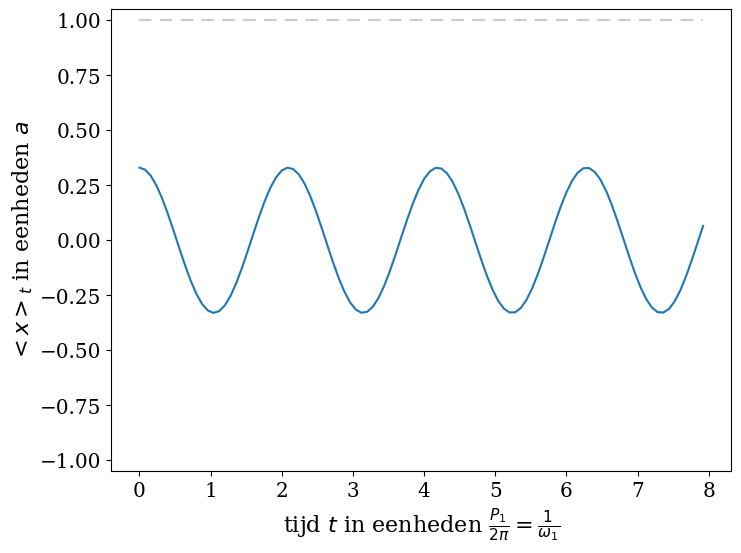

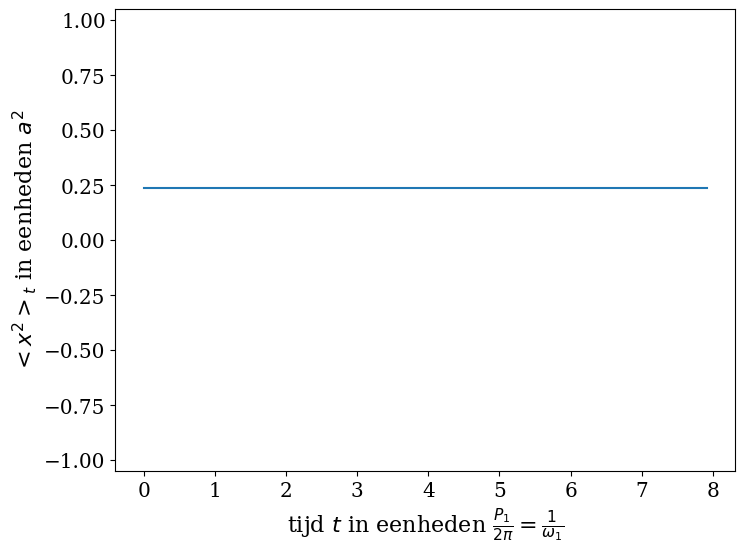

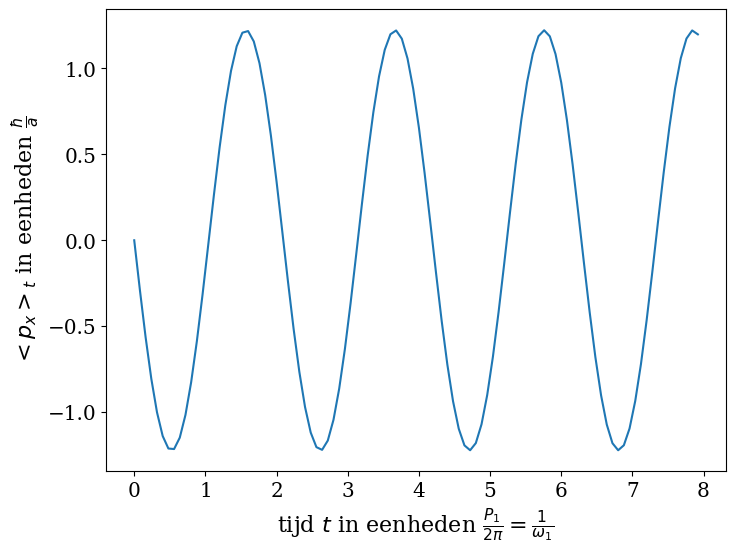

In [17]:
# figuur van verwachtingswaarde van de positie als functie van de tijd
fig7, ax7 = plt.subplots(1, 1,  figsize = (8, 6))
ax7.set_xlabel(r'tijd $t$ in eenheden $\frac{ P_1} {2 \pi} = \frac{1}{\omega_1}$',fontsize=16)
ax7.set_ylabel(r'$<x>_t$ in eenheden $a$',fontsize=16)
ax7.set_ylim([-1.05,+1.05]) # fix the y axisaxis9
ax7.plot(tlist,x_as_function_of_t)
ax7.plot(tlist,norm_as_function_of_t,dashes=[6,4],alpha=0.4,color='grey')
plt.show(fig7)
print("\n \n \n") # spaties tussen figuren genereren

# figuur van verwachtingswaarde van de positie^2 (x^2) als functie van de tijd
fig9, ax9 = plt.subplots(1, 1,  figsize = (8, 6))
ax9.set_xlabel(r'tijd $t$ in eenheden $\frac{ P_1} {2 \pi} = \frac{1}{\omega_1}$',fontsize=16)
ax9.set_ylabel(r'$<x^2>_t$ in eenheden $a^2$',fontsize=16)
ax9.set_ylim([-1.05,+1.05]) # fix the y axis
ax9.plot(tlist,x2_as_function_of_t)
#ax7.plot(tlist,norm_as_function_of_t,dashes=[6,4],alpha=0.4,color='gaxis9
plt.show(fig9)
print("\n \n \n") # spaties tussen figuren genereren


# verwachtingswaarde van de impuls als functie van de tijd
fig8, ax8 = plt.subplots(1, 1,  figsize = (8, 6))
ax8.set_xlabel(r'tijd $t$ in eenheden $\frac{ P_1} {2 \pi} = \frac{1}{\omega_1}$',fontsize=16)
ax8.set_ylabel(r'$<p_x>_t$ in eenheden $\frac{\hbar}{a}$',fontsize=16)
#ax7.set_ylim([-1.05,+1.05]) # fix the y axis
ax8.plot(tlist,px_as_function_of_t)
plt.show(fig8)


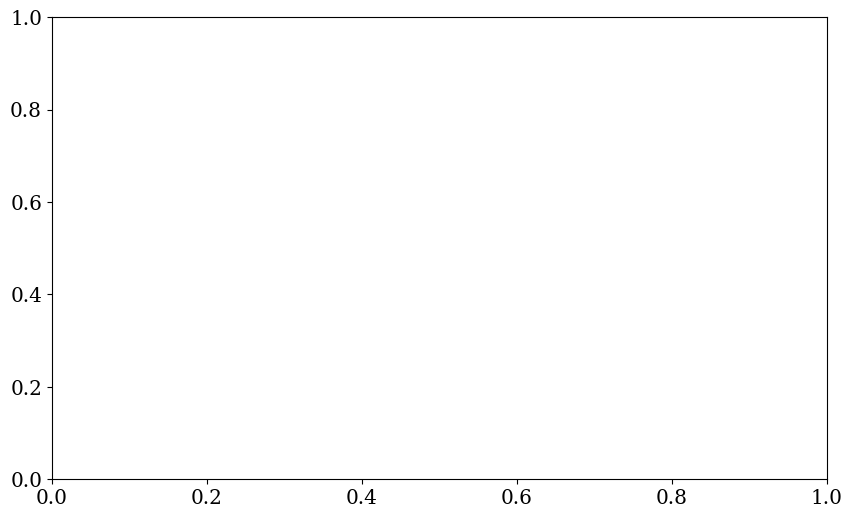

In [18]:
# animation ...
# https://stackoverflow.com/questions/62335385/animating-a-line-plot-over-time-in-python
# https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook

# this part of the code can be slow ... animatie van de t afhankelijkheid van de P(x,t)
# alternate way of plotting time variation: ridgeline plots or waterfall plots

fig, ax = plt.subplots(1, 1, figsize = (10, 6))

def animatePxt(i):
    ax.cla() # clear the previous image
    ax.plot(xlist, Pxt[i,:],label='Tijdstip= {}'.format(i)) # plot the line
    ax.set_xlabel(r'positie $x$ in eenheden $a$',fontsize=16)
    ax.set_ylabel(r'P(x,t)',fontsize=16)
    ax.legend(frameon=False,fontsize=16,ncol=1,loc='upper right')
    ax.set_xlim([-1, +1]) # fix the x axis
    ax.set_ylim([1.1*np.min(Pxt), 1.2*np.max(Pxt)]) # fix the y axis

anim = animation.FuncAnimation(fig, animatePxt, frames = len(tlist), repeat=True, blit = False)
plt.show()
anim.save('AnimationPxt.gif', writer = "pillow", fps=2 )
HTML(anim.to_html5_video())


# Bij paragraaf 4.7: De lineair harmonische oscillator

- de potentiaal is van de vorm $V(x) = \frac {1} {2} k x ^2 = \frac {1} {2} m \omega ^2 x ^2 $
- de TISE kan in de vorm gebracht worden: $\frac { d ^2 \psi ( \xi )} { d \xi ^2} + \left( \lambda - \xi ^2
\right) \psi ( \xi ) = 0$ waarbij men de volgende grootheden introduceert: $\omega = \sqrt{ \frac {k} {m} } \; \; ; \; \;
\lambda = \frac {2 E} {\hbar \omega}  \; \; ; \; \;
\alpha = \sqrt{ \frac {m \omega} {\hbar} } \; \; ; \; \;  
\xi = \alpha x$ ($\xi$ is een dimensieloze positie-grootheid)

- fysische aanvaardbare oplossingen van de TISE voor $\left( \lambda = 2 n + 1 \right)$ met $n=0,1,2, \ldots$ ; dit zijn stuk voor stuk gebonden toestanden met discrete energie-eigenwaarden: $E_n = \hbar \omega \left(n + \frac{1}{2}  \right) $
- golffuncties $\psi _n \left( \xi \right) = \psi_n \left( \sqrt{\frac{ m \omega} {\hbar}} x  \equiv \alpha x \right) = N_n H_n (\xi) \exp - \frac {\xi ^2} {2} $ horende bij de energie-eigenwaarden $E_n = \hbar \omega \left( n +  \frac {1} {2} \right) $ voor $n=0,1,2,3, \ldots $

- $ H_n (\xi)$ is de Hermite polynoom
- Hermite polynoom via scipy.special.eval_hermite(n, x, out=None)
- normering (zie (4.167) in Bransden & Joachain): $N_n = \sqrt{\frac{\alpha}{\sqrt{\pi} 2^n n!}}$
- klassieke positiewaarschijnlijkheidsdichtheid bij het kwantumgetal $n$: $P_{cl} (\xi) = \frac {1} {\pi \sqrt{\xi _0 ^2 - \xi ^2}}$ met $\xi _0 = \sqrt {2n + 1}$
- kwantummechanische positiewaarschijnlijkheidsdichtheid bij het kwantumgetal $n$: $P_n (\xi) = \psi _n ^ {*} \left( \xi \right) \psi _n \left( \xi \right)$

In [19]:
# paar functies waarmee we de HO golffuncties kunnen berekenen

def factorial(n): # factorial in simple Python
  x=1.
  for kk in range(1,n+1):
    x*=kk
  return x

def normhowav(n,alfa): # normalization factor of HO wave function
  return np.sqrt(alfa/(np.sqrt(np.pi)*factorial(n)*2.**n))

def howav(n,alfa,xi):  # normalized HO wave function
  return normhowav(n,alfa)*eval_hermite(n,xi)*np.exp(-np.power(xi,2.)/2.)


Verwachtingswaarde $\xi ^2$ voor n=0 is 0.4999999999556081 (Exact=0.5)
Verwachtingswaarde $\xi ^2$ voor n=1 is 1.4999999976997112 (Exact=1.5)
Verwachtingswaarde $\xi ^2$ voor n=2 is 2.499999942599357 (Exact=2.5)
Verwachtingswaarde $\xi ^2$ voor n=3 is 3.499999081977179 (Exact=3.5)
Verwachtingswaarde $\xi ^2$ voor n=4 is 4.499989437489813 (Exact=4.5)
Verwachtingswaarde $\xi ^2$ voor n=5 is 5.499906978831559 (Exact=5.5)


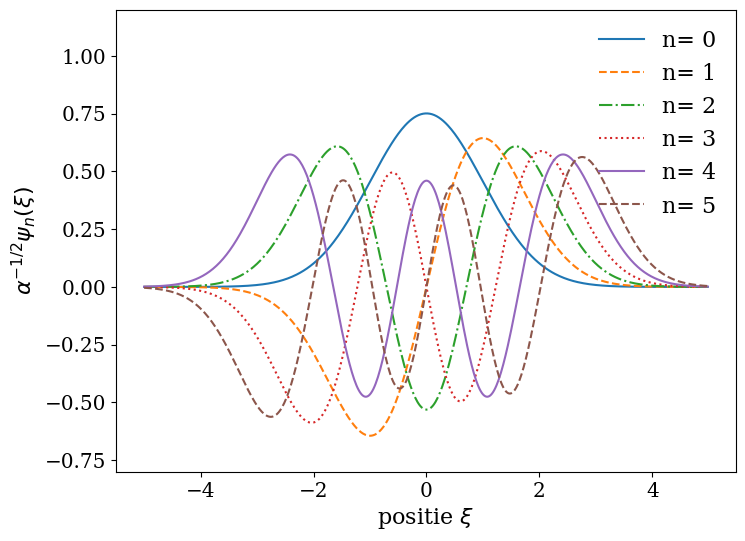

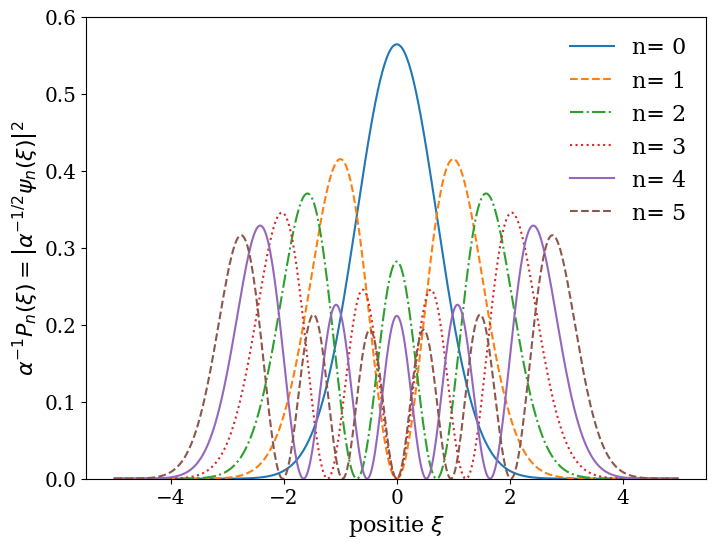

In [20]:
# Figuur van de HO energie-eigenfuncties voor verschillende kwantumgetallen n
# Figuur van de HO positiewaarschijnlijkheidsdichtheden voor verschillende n
# INPUT ..
xivalstep=0.02
xival = np.arange(-5.0,+5.0,xivalstep,dtype=float) # discrete xi waarden
alfa=1. # de waarde van \alpha

#
# fig4: golffunctie bij verschillende n
# fig5: P_n(x,t) uit golffuncties
#
linestyles = ['-', '--', '-.', ':']
fig4, ax4 = plt.subplots(1, 1,  figsize = (8, 6))
fig5, ax5 = plt.subplots(1, 1,  figsize = (8, 6))
ax4.set_xlabel(r'positie $\xi$',fontsize=16)
ax4.set_ylabel(r'$ \alpha ^{-1/2} \psi _n (\xi)$',fontsize=16)
ax5.set_xlabel(r'positie $\xi$',fontsize=16)
ax5.set_ylabel(r'$ \alpha ^{-1} P_n (\xi)=  \left| \alpha ^{-1/2} \psi _n (\xi) \right| ^2$',fontsize=16)
ax4.set_xlim([1.1*np.min(xival),1.1*np.max(xival)]) # fix the range of the x axis
ax5.set_xlim([1.1*np.min(xival),1.1*np.max(xival)]) # fix the range of the x axis
ax4.set_ylim([-0.8, +1.2]) # fix the y axis
ax5.set_ylim([0, +0.6])

for kk in range(6): # hier kun je de range van n waarden veranderen
  wavho=howav(kk,alfa,xival)
  ax4.plot(xival, wavho,label='n= {}'.format(kk),linestyle=linestyles[kk%4]) # plot de golffunctie \psi_n(\xi)
  ax5.plot(xival, np.power(wavho,2.),label='n= {}'.format(kk),linestyle=linestyles[kk%4]) # plot de P_n (\xi)
  verwachtingxi2=xivalstep*np.trapz(np.power(np.multiply(xival,wavho),2.)) # verwachtingswaarde van xi^2 = (n+1/2)
  print(r'Verwachtingswaarde $\xi ^2$ voor n={0} is {1} (Exact={2})'.format(kk,verwachtingxi2,(2.*kk+1.)/2.))

ax4.legend(frameon=False,fontsize=16,ncol=1,loc='upper right')
ax5.legend(frameon=False,fontsize=16,ncol=1,loc='upper right')


<ipython-input-21-5df8ea4466e5>:8: RuntimeWarning: invalid value encountered in power
  pclxi=1./(np.pi*np.power((xi0**2-np.power(xival,2.)),0.5))


Text(0, 0.5, '$ \\alpha ^{-1} P_n (\\xi)=  \\left| \\alpha ^{-1/2} \\psi _n (\\xi) \\right| ^2$')

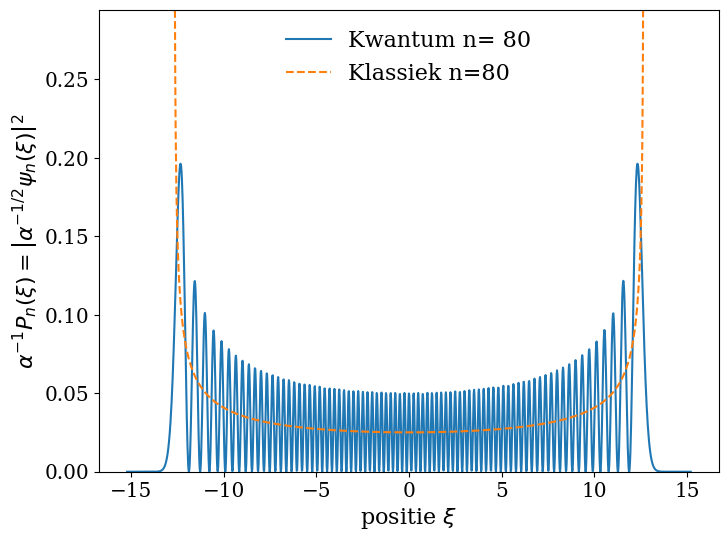

In [21]:
# vergelijk de HO klassieke positiewaarschijnlijkheidsdichtheid met de kwantum versie
# INPUT ...
kk=80 # kies het kwantumgetal n (hoe groter n hoe dichter kwantum=klassiek)
xi0=m.sqrt(2*kk+1.)
xivalstep=0.02
xival = np.arange(-1.2*xi0,+1.2*xi0,xivalstep,dtype=float) # discrete xi waarden
fig6, ax6 = plt.subplots(1, 1, figsize = (8, 6))
pclxi=1./(np.pi*np.power((xi0**2-np.power(xival,2.)),0.5))
wavho=howav(kk,alfa,xival)
ax6.plot(xival, np.power(wavho,2.),label='Kwantum n= {}'.format(kk),linestyle='-') # plot de \P_n(\xi)
ax6.plot(xival, pclxi,label='Klassiek n={}'.format(kk),linestyle='--') # plot de klassieke \P_n(\xi)
ax6.legend(frameon=False,fontsize=16,ncol=1,loc='best')
ax6.set_xlim([1.1*np.min(xival),1.1*np.max(xival)]) # fix the x axis
ax6.set_ylim([0.,1.5*np.max(np.power(wavho,2.))])
ax6.set_xlabel(r'positie $\xi$',fontsize=16)
ax6.set_ylabel(r'$ \alpha ^{-1} P_n (\xi)=  \left| \alpha ^{-1/2} \psi _n (\xi) \right| ^2$',fontsize=16)

De ODE die opgelost wordt voor de TISE van een lineair harmonische oscillator (LHO):

$\psi ^{\prime \prime} (\xi) + (\lambda - \xi ^2) \psi (\xi) =0$

Men kan de TISE van de HO (is een ODE) numeriek oplossen voor elke waarde van $\lambda$.  

Enkel voor $\lambda=2n+1=1,3,5,7, \ldots$ kan men fysisch aanvaardbare golffuncties vinden. De corresponderende klassieke keerpunten worden gegegevn door $\pm \xi _0 = \pm \sqrt{\lambda = 2 n +1}$. Wat volgt toont heel duidelijk aan: zelfs bij kleine afwijkingen van oneven waarden van $\lambda$ zijn de oplossingen geen golffuncties die aan de fysische voorwaarden voldoen.  In de figuren worden ook de klassieke keerpunten $\xi _0$ aangegeven. Klassieke beweging is mogelijk in het interval $(- \xi _0, + \xi _0)$

Dit kan eventueel helpen voor algemene uitleg bij het numeriek oplossen van tweede-orde ODEs:

https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html



In [7]:
#
# parameter lamb kan meegegeven worden aan ODEINT via args=(lamb,) ..
def TISEvanHO(U, xi,lamb):
    # Hiebij is U een vector zodat: U[0] = \psi en U[1]= afgeleide van \psi.
    # Deze functie bepaalt [afgeleide van psi, tweede afgeleide van psi]

    return [U[1], (xi**2.-lamb)*U[0]]

# deze functie lost de TISE voor een LHO op voor een reeks van lambvalues en maakt een plot van de resultaten
# xi0value=sqrt(2n+1=\lambda): klassieke beweging mogelijk in (-xi0value,+xi0value)
def solve_the_TISE_andplot(xivalstep,xiendpoint,lambvalues,extratitle,xi0value):
  """

  Args:
    xivalstep:
    xiendpoint:
    lambvalues:
    extratitle:
    xi0value:
  """
  U0 = [0., 0.1] # beginvoorwaarden voor [\psi, afgeleide van \psi] links van de potentiaal
  xiran = np.arange(-xiendpoint,+xiendpoint,xivalstep,dtype=float) # discrete xi waarden
  plt.subplots(1, 1, figsize = (10, 6))
  plt.ylim((-0.8,0.8))
  plt.xlabel(r"$\xi$")
  plt.ylabel("Goffunctie")
  plt.title("Harmonische oscillator: "+extratitle)
  for lamb in lambvalues: # loop over de waarden van \lambda
# parameter to use in TISEvanHO
# https://stackoverflow.com/questions/16001341/having-trouble-while-using-scipy-integrate-odeint-with-python/16008005#16008005
    Us = odeint(TISEvanHO, U0, xiran,args=(lamb,))
    Oplossing = Us[:,0]
    Normering=xivalstep*np.trapz(np.multiply(Oplossing,Oplossing))
    Oplossing=Oplossing/np.sqrt(Normering) # golffunctie die op 1 genormeerd is in interval xiran
    plt.plot(xiran,Oplossing,label='$\lambda$={0}'.format(str(lamb)))
  plt.legend(frameon=False,fontsize=16,ncol=1,loc='best')
  plt.axvline(x=xi0value,color='grey',linestyle='dashed',alpha=0.5) # klassiek keerpunt
  plt.axvline(x=-xi0value,color='grey',linestyle='dashed',alpha=0.5) # klassiek keerpunt
  plt.axhline(y=0.0,color='DarkGoldenRod',linestyle='dashed',alpha=0.5)


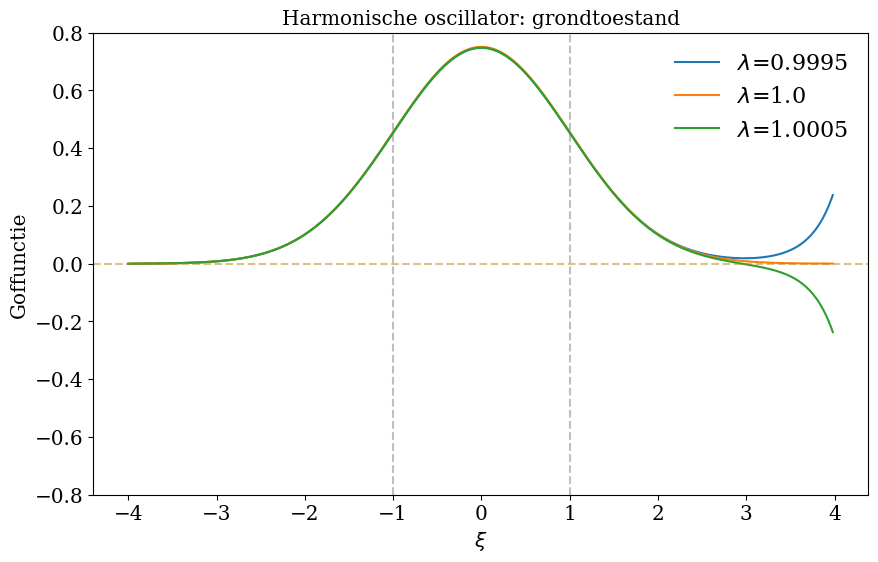

In [12]:
# de golffunctie voor de grondtoestand kun je vinden voor \lambda =1
# grondtoestand is een even functie zonder "zero's"
lambvalues=[0.9995,1.0,1.0005] # een aantal lambda values
xivalstep=0.02 ; xiendpoint=4.0 ; xi0value=1.0
solve_the_TISE_andplot(xivalstep,xiendpoint,lambvalues,"grondtoestand",xi0value)

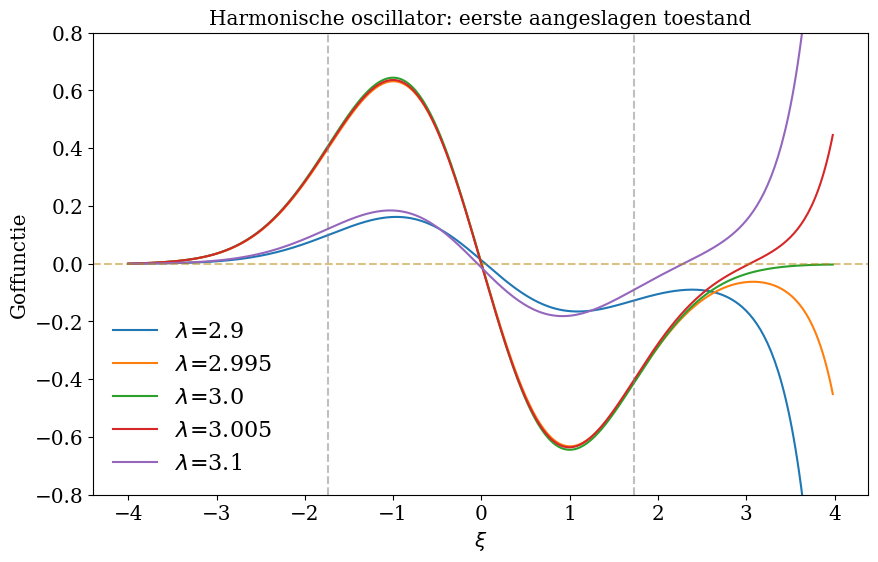

In [10]:
# de golffunctie voor de eerste aangeslagen toestand kun je vinden voor \lambda =3
# eerste aangeslagen toestand is een oneven functie met een  "zero"
lambvalues=[2.9,2.995,3.0,3.005,3.1]
xivalstep=0.02 ; xiendpoint=4.0 ; xi0value=np.sqrt(3.0)
solve_the_TISE_andplot(xivalstep,xiendpoint,lambvalues,"eerste aangeslagen toestand",xi0value)



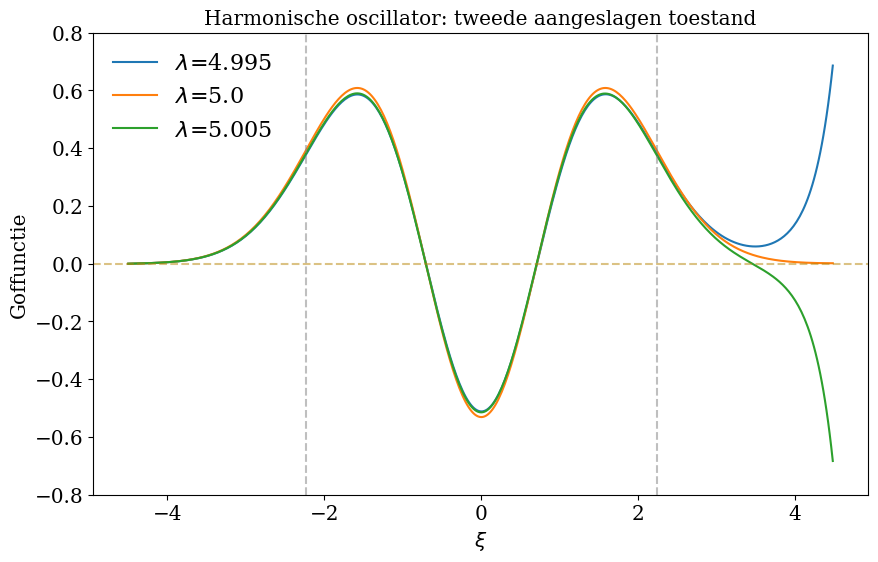

In [9]:
# de golffunctie voor de tweede aangeslagen toestand kun je vinden voor \lambda =5
# tweede aangeslagen toestand is een even functie met twee "zero's"
lambvalues=[4.995,5.0,5.005]
xivalstep=0.02 ; xiendpoint=4.5 ; xi0value=np.sqrt(5.0)
solve_the_TISE_andplot(xivalstep,xiendpoint,lambvalues,"tweede aangeslagen toestand",xi0value)


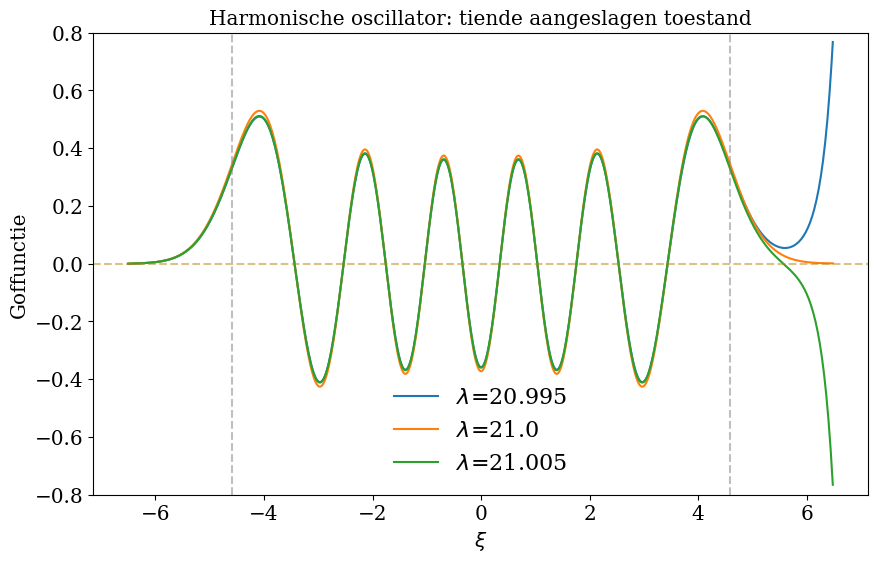

In [8]:
# de golffunctie voor de tiende aangeslagen toestand kun je vinden voor \lambda =5
# tiende de aangeslagen toestand (n=10) is een even functie met tien "zero's"
lambvalues=[20.995,21.0,21.005]
xivalstep=0.02 ; xiendpoint=6.5 ; xi0value=np.sqrt(21.0)
solve_the_TISE_andplot(xivalstep,xiendpoint,lambvalues,"tiende aangeslagen toestand",xi0value)
